# Import Libraries:

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import random as rd
from scipy.spatial import distance_matrix
from sklearn.metrics.pairwise import euclidean_distances #We can calculate this matrix using 2 for loops, 

# Reading Iris data
First we read the data from the dataset using read_csv from the pandas library.

In [2]:
dataset=pd.read_csv('iris.csv')

# Data Exploration
Now we view the Head and Tail of the data using head() and tail() respectively.

In [3]:
dataset.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
dataset.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


Assign columns to the dataset

In [5]:

columns_value = ['sepal length (cm)',	'sepal width (cm)'	,'petal length (cm)',	'petal width (cm)','target']
dataset = dataset.values
dataset = pd.DataFrame(dataset,columns=columns_value)

Convert object datatype to float

In [6]:
dataset ['sepal length (cm)'] = dataset ['sepal length (cm)'].astype(np.float64)
dataset ['sepal width (cm)'] = dataset ['sepal width (cm)'].astype(np.float64)
dataset ['petal length (cm)'] = dataset ['petal length (cm)'].astype(np.float64)
dataset ['petal width (cm)'] = dataset ['petal width (cm)'].astype(np.float64)

Show the categories in the target variable

In [7]:
dataset['target'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        49
Name: target, dtype: int64

Correlation of the data

In [8]:
dataset.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.103784,0.871283,0.816971
sepal width (cm),-0.103784,1.000000,-0.415218,-0.350733
petal length (cm),0.871283,-0.415218,1.000000,0.962314
petal width (cm),0.816971,-0.350733,0.962314,1.000000


EDA

<AxesSubplot:>

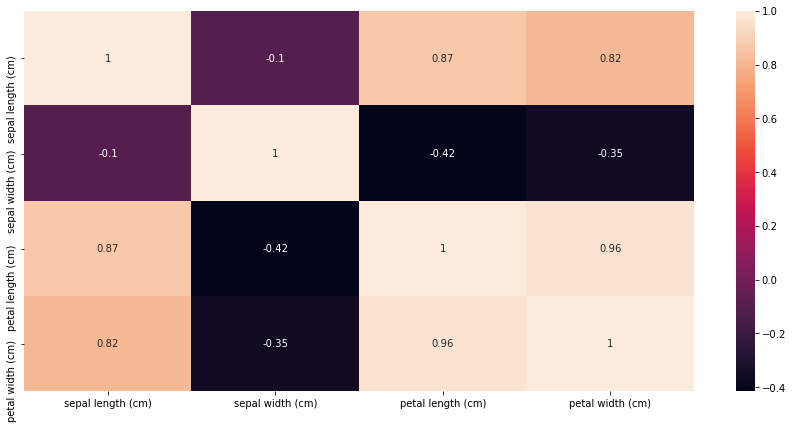

In [9]:
plt.figure(figsize=(15,7)) # heatmap
sns.heatmap(dataset.corr(),annot=True)

Visualize the data before clustered

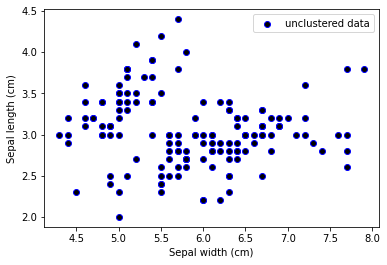

In [10]:
beforeClustered= np.array(dataset)
plt.xlabel('Sepal width (cm)')
plt.ylabel('Sepal length (cm)')
plt.scatter(
beforeClustered[:,0],
beforeClustered[:,1],
c='black',
cmap='Dark2',
edgecolors='b',
label='unclustered data'
)
plt.legend()
plt.show()

C:\Users\Sinte\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


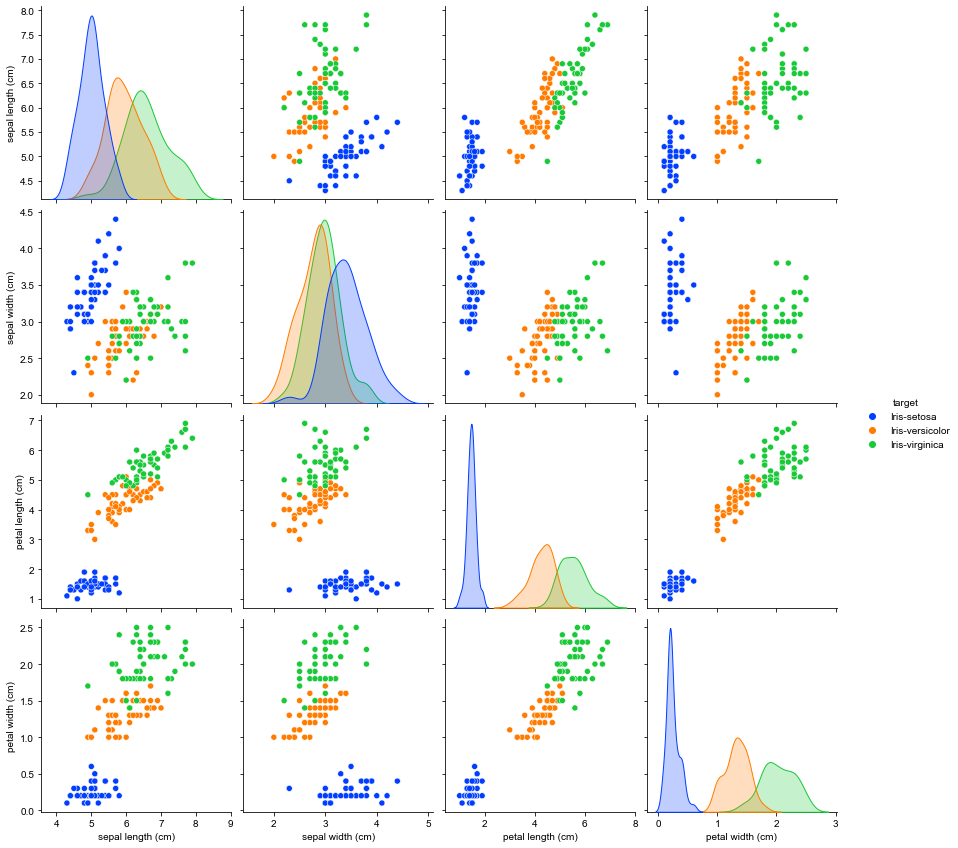

In [11]:
sns.pairplot(dataset,hue="target",palette="bright",diag_kind="auto",size=3) #to visualise all the attributes dependency on each other
sns.set_style("whitegrid");

# Data preparation
Here we have the target variable ‘target’. We need to remove the target variable so that this dataset can be used to work in an unsupervised learning environment.

In [12]:
# Convert the 'target' feature to a numerical one and store the labels into a variable y  

y = dataset['target'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
y = np.array(y)
# store the iris data in X
X = dataset.drop('target', axis=1)

# X = dataset.iloc[:,:4]


In [13]:
print(X.shape)
print(y.shape)

(149, 4)
(149,)


# Implementation of Clustering Algorithms
The iloc function is used to get the features we require. We also use '.values' function to get an array of the dataset. 


In [14]:
X=X.iloc[:,:4].values

## Hierarchical Clustering
Agglomerative Clustering is a member of the Hierarchical Clustering family which work by merging every single cluster with the process that is repeated until all the data have become one cluster.
### Steps to Perform Hierarchical Clustering.
The step that Agglomerative Clustering take are:
* Step 1. Each data point is assigned as a single cluster
* Step 2. Determine the distance measurement and calculate the distance matrix
* Step 3. Determine the linkage criteria to merge the clusters
* Step 4. Update the distance matrix
* Step 5. Repeat the process until every data point become one cluster
### To calculate distance between two clusters
For calculating the distance between two data points, we use the Euclidean Distance Formula.To calculate the distance between two clusters, we can use four methods-
1. Closet Points- That means we take the distance of two closet points from two clusters. It is also known as Single Linkage.
2. Furthest Points- Another option is to take the two furthest points and calculate their distance. And consider this distance as the distance of two clusters. It is also known as Complete-linkage
3. Average Distance- In that method, you can take the average distance of all the data points and use this average distance as the distance of two clusters. It is known as Average-linkage.
4. Distance between Centroids- Another option is to find the centroid of clusters and then calculate the distance between two centroids. It is known as Centroid-linkage.

* NB we implement Average distance to calculate the distance between two clusters

In [15]:
def dendrogram(data):
    Cluster_Centers=data.copy()
    index = 1
    Output={}  #This dictionary keeps record of which data points or cluster are merging, hence can be used to make a dendogram
    for k in range(Cluster_Centers.shape[0]):
        Output[k+1]=np.array([]).reshape(Cluster_Centers.shape[0],0)
    HistoryCentroid=np.array([])
    HistoryED=np.array([])
    Cluster_Centers=Cluster_Centers[np.argsort(np.sum(Cluster_Centers**2,axis=1))]


    while Cluster_Centers.shape[0]!=1:
        dist=np.tril(distance_matrix(Cluster_Centers,Cluster_Centers))
        indices=np.where(dist==np.min(dist[dist!=0]))[0]
        if type(indices)==np.ndarray:
            i1=indices[0]
            i2=np.where(dist==np.min(dist[dist!=0]))[1][0]
        else:
            i1=int(np.where(dist==np.min(dist[dist!=0]))[0])
            i2=int(np.where(dist==np.min(dist[dist!=0]))[1])
            
        if i1>i2:
            i1,i2=i2,i1
            
        ed=np.min(dist[dist!=0])
        c1=0
        c2=0
        #Clusters[Cluster_Centers.tolist().index(Cluster_Centers[i2].tolist())]=Clusters[Cluster_Centers.tolist().index(Cluster_Centers[i1].tolist())]
        if Cluster_Centers[i1].tolist() in HistoryCentroid.tolist():
            pos=HistoryCentroid.tolist().index(Cluster_Centers[i1].tolist())
            c1=HistoryED[pos]
            
        if Cluster_Centers[i2].tolist() in HistoryCentroid.tolist():
            pos=HistoryCentroid.tolist().index(Cluster_Centers[i2].tolist())
            c2=HistoryED[pos]
        
        if HistoryCentroid.size==0:
            HistoryCentroid=np.hstack((HistoryCentroid,(Cluster_Centers[i1]+Cluster_Centers[i2])/(2)))
            HistoryED=np.hstack((HistoryED,ed))
        else:
            HistoryCentroid=np.vstack((HistoryCentroid,(Cluster_Centers[i1]+Cluster_Centers[i2])/(2)))
            HistoryED=np.vstack((HistoryED,ed))
        
      
        p1=np.sqrt(np.sum(Cluster_Centers[i1]**2))
        p2=np.sqrt(np.sum(Cluster_Centers[i2]**2))
        
        Cluster_Centers[i1]=(Cluster_Centers[i1]+Cluster_Centers[i2])/(2)
        Cluster_Centers=np.delete(Cluster_Centers,i2,axis=0)
                
        Output[index] = [[p1,p1,p2,p2],[c1,ed,ed,c2]]
        index = index + 1
      
    return Output

In [16]:
def agglomeretive_fit_predict(data, cutoff): 
    #This is done using dynamic programming approach
    # if 1, it is single linkage else 2 is complete linkage, 3 is average linkage
    distance_matrix = euclidean_distances(data, data) #Step 1 - Calculate distance matrix
    distance_matrix = np.tril(distance_matrix) #Step 2 - Since matrix is symmetric, we just keep lower triangle matrix
    distance_matrix[distance_matrix == 0] = np.inf #Step 3 - Replace 0 by inf, it makes it easy for us to extract minimum using min function
    df = pd.DataFrame(data=np.ones(data.shape[0])*np.inf) #Initialized a dataframe which will store which point is in which cluster
    if cutoff > distance_matrix.shape[0]: #If user provides impractical cut-off, cluster everthing into one cluster and not listen to user 
        cutoff = distance_matrix.shape[0]
    
    d_average = {}
    for i in range(0,cutoff):
        ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
        if i == 0:
            df.iloc[ij_min[0]] = 0
            df.iloc[ij_min[1]] = 0
        else:
            try:
                a = int(df.iloc[ij_min[0]])
            except:
                df.iloc[ij_min[0]] = i
                a = i
            try:
                b = int(df.iloc[ij_min[1]])
            except:
                df.iloc[ij_min[1]] = i
                b = i
            df[(df[0]==a) | (df[0]==b)] = i
        d_average[i] = ij_min
        for j in range(0, ij_min[0]):
            if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
                #after two points/cluster are linked, to calculate new distance we take average distance for average linkage
                distance_matrix[ij_min[1]][j] = (distance_matrix[ij_min[0]][j] + distance_matrix[ij_min[1]][j])/2.0          
        distance_matrix[ij_min[0]] = np.inf
       

    #Let's convert it to dataset.target format
    target = df[0].unique()
    i = 0
    for t in target:
        df[0][df[0]==t] = i
        i = i + 1


    return d_average, df[0], target

# Model Buliding

In [17]:
Output = dendrogram(X)

C:\Users\Sinte\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


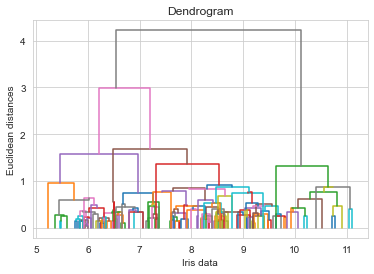

In [18]:
for k in range(X.shape[0]):
     plt.plot(Output[k+1][0],Output[k+1][1])
plt.title('Dendrogram')
plt.xlabel('Iris data')
plt.ylabel('Euclidean distances')
plt.show()

### Finding Optimal Number of Clusters
We can use a dendrogram to visualize the history of groupings and figure out the optimal number of clusters.
* Determine the largest vertical distance that doesn’t intersect any of the other clusters
* Draw a horizontal line at both extremities
* The optimal number of clusters is equal to the number of vertical lines going through the horizontal line

To find Optimal Number of Clusters , we used Dendrogram.So a cut-off at 146 we would end up with 3 different clusters

In [19]:
#Fitting hierarchical clustering to the iris dataset
# There are two algorithms for hierarchical clustering: Agglomerative Hierarchical Clustering and 
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our 
# algorithm class  
d, target,target_group = agglomeretive_fit_predict(X,146)
y_hc=target.values
target_group

array([134., 145., 142.])

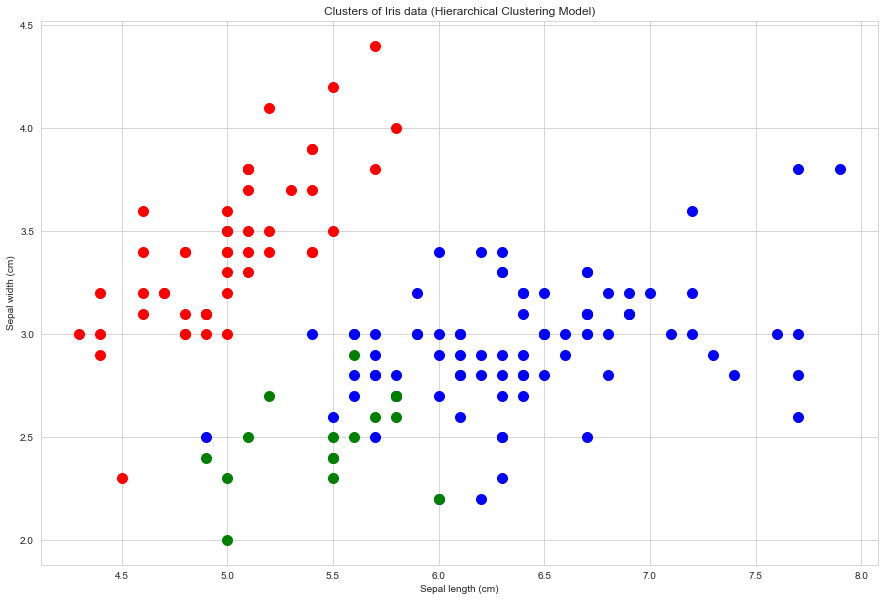

In [20]:
#Visualizing the clusters. This code is similar to k-means visualization code.
#We only replace the y_kmeans vector name to y_hc for the hierarchical clustering 
plt.figure(figsize = (15,10))
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')

plt.title('Clusters of Iris data (Hierarchical Clustering Model)')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

Text(0.5, 1.0, 'Predicted')

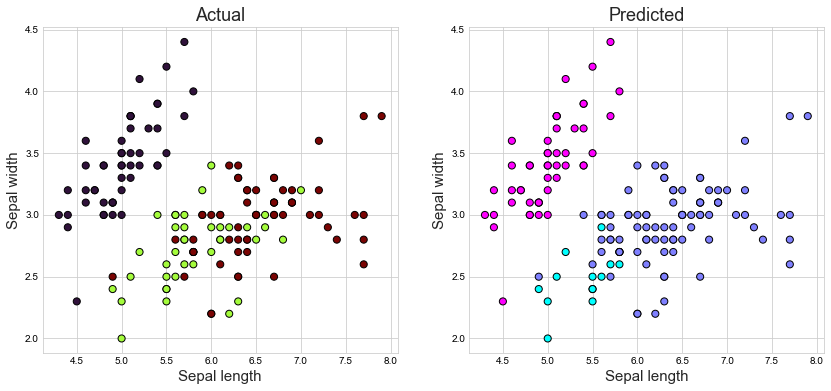

In [21]:
# Plot the identified clusters and compare with the answers
sns.set_style("whitegrid");
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='turbo', edgecolor='k', s=50)
axes[1].scatter(X[:, 0], X[:, 1], c=y_hc, cmap='cool_r', edgecolor='k', s=50)
axes[0].set_xlabel('Sepal length', fontsize=15)
axes[0].set_ylabel('Sepal width', fontsize=15)
axes[1].set_xlabel('Sepal length', fontsize=15)
axes[1].set_ylabel('Sepal width', fontsize=15)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

## Let’s implement all these steps using the scipy.cluster.hierarchy library so that we can compare the results:

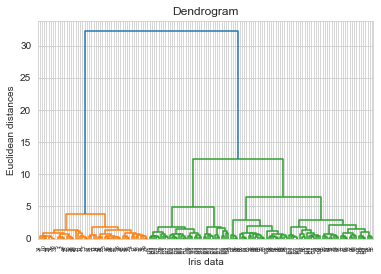

In [22]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Iris data')
plt.ylabel('Euclidean distances')
plt.show()

In [23]:
#Fitting hierarchical clustering to the iris dataset
# There are two algorithms for hierarchical clustering: Agglomerative Hierarchical Clustering and 
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our 
# algorithm class  
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
# Lets try to fit the hierarchical clustering algorithm  to dataset X while creating the 
# clusters vector that tells for each customer which cluster the customer belongs to.
y_kmeans_bulitin=hc.fit_predict(X)

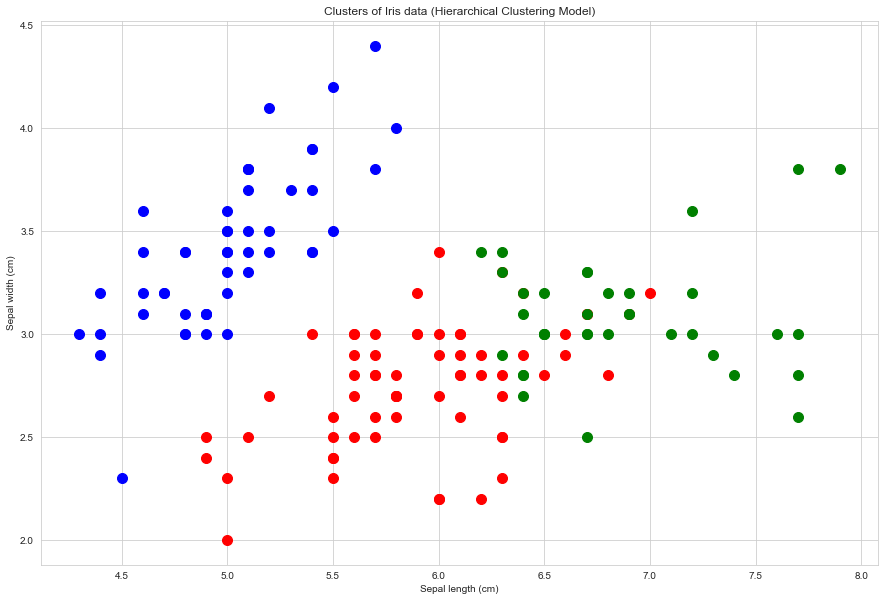

In [24]:
#Visualizing the clusters. This code is similar to k-means visualization code.
#We only replace the y_kmeans vector name to y_hc for the hierarchical clustering 
plt.figure(figsize = (15,10))
plt.scatter(X[y_kmeans_bulitin==0, 0], X[y_kmeans_bulitin==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans_bulitin==1, 0], X[y_kmeans_bulitin==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans_bulitin==2, 0], X[y_kmeans_bulitin==2, 1], s=100, c='green', label ='Cluster 3')

plt.title('Clusters of Iris data (Hierarchical Clustering Model)')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

Text(0.5, 1.0, 'Predicted')

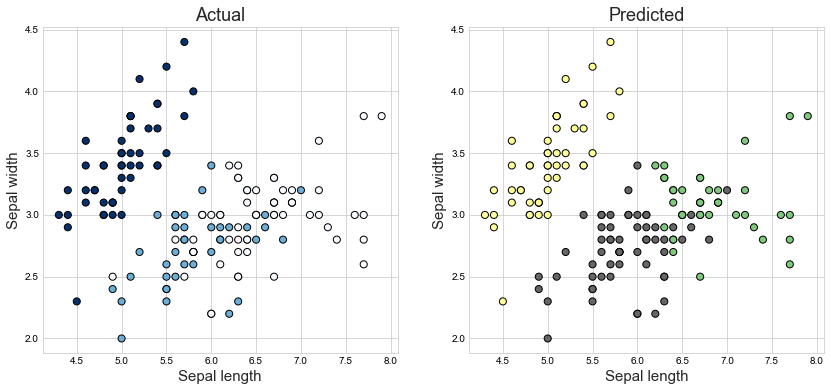

In [25]:
# Plot the identified clusters and compare with the answers
sns.set_style("whitegrid");
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='Blues_r', edgecolor='k', s=50)
axes[1].scatter(X[:, 0], X[:, 1], c=y_kmeans_bulitin, cmap='Accent_r', edgecolor='k', s=50)
axes[0].set_xlabel('Sepal length', fontsize=15)
axes[0].set_ylabel('Sepal width', fontsize=15)
axes[1].set_xlabel('Sepal length', fontsize=15)
axes[1].set_ylabel('Sepal width', fontsize=15)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)